In [1]:
inputs = {  'investment_cost': 30e6,
            'yearly_ops_cost': 2e6,
             'yearly_revenue': 10e6,
             'discount_rate': 0.1,
             'inflation_rate': 0.02}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [4]:
df['year'] = [2020, 2021, 2022, 2023, 2024, 2025]
df['year_n'] = [num - df['year'][0] for num in df['year']]

print(df.head(2))

   year  year_n
0  2020       0
1  2021       1


In [5]:
df['inflation_factor'] = [(1+inputs['inflation_rate'])**num_year_n for num_year_n in df['year_n']]
df.head(2)

,year,year_n,inflation_factor
0,2020,0,1.00
1,2021,1,1.02


In [6]:
df['revenue'] = [inputs['yearly_revenue']  * num_inf for num_inf in df['inflation_factor']]
df['revenue'][0] = 0
print(df.head(2))

   year  year_n  inflation_factor     revenue
0  2020       0              1.00         0.0
1  2021       1              1.02  10200000.0


In [7]:
df['investment'] = [0 for col in range(len(df))]
df['investment'][0] = inputs['investment_cost']
print(df.head(2))

   year  year_n  inflation_factor     revenue  investment
0  2020       0              1.00         0.0    30000000
1  2021       1              1.02  10200000.0           0


In [8]:
df['operational'] = [inputs['yearly_ops_cost']*num for num in df['inflation_factor']]
df['operational'][0] = 0
df.head(2)

,year,year_n,inflation_factor,revenue,investment,operational
0,2020,0,1.00,0.0,30000000,0.0
1,2021,1,1.02,10200000.0,0,2040000.0


In [ ]:
df['cashflowww'] = [(num1 - num2 - num3) for num1 in df['revenue'] for num2 in df['investment'] for num3 in df['operational']]

In [10]:
df['cashflow'] = [0 for col in range(len(df))]
for i in range(len(df)):
    df['cashflow'][i] = df['revenue'][i] - df['investment'][i] - df['operational'][i]
print(df.head())

   year  year_n  inflation_factor     revenue  investment  operational  \
0  2020       0          1.000000         0.0    30000000         0.00   
1  2021       1          1.020000  10200000.0           0   2040000.00   
2  2022       2          1.040400  10404000.0           0   2080800.00   
3  2023       3          1.061208  10612080.0           0   2122416.00   
4  2024       4          1.082432  10824321.6           0   2164864.32   

   cashflow  
0 -30000000  
1   8160000  
2   8323200  
3   8489664  
4   8659457  


In [11]:
df['cum_cashflow'] = df['cashflow'].cumsum()
df.head(2)

,year,year_n,inflation_factor,revenue,investment,operational,cashflow,cum_cashflow
0,2020,0,1.00,0.0,30000000,0.0,-30000000,-30000000
1,2021,1,1.02,10200000.0,0,2040000.0,8160000,-21840000


In [12]:
df['discount_factor'] = [1/((1+inputs['discount_rate'])**num1) for num1 in df['year_n']]
df.head(2)

,year,year_n,inflation_factor,revenue,investment,operational,cashflow,cum_cashflow,discount_factor
0,2020,0,1.00,0.0,30000000,0.0,-30000000,-30000000,1.000000
1,2021,1,1.02,10200000.0,0,2040000.0,8160000,-21840000,0.909091


In [13]:
df['present_value'] = [0 for col in range(len(df))]
for i in range(len(df)):
    df['present_value'][i] = df['cashflow'][i] * df['discount_factor'][i]
print(df.head())

   year  year_n  inflation_factor     revenue  investment  operational  \
0  2020       0          1.000000         0.0    30000000         0.00   
1  2021       1          1.020000  10200000.0           0   2040000.00   
2  2022       2          1.040400  10404000.0           0   2080800.00   
3  2023       3          1.061208  10612080.0           0   2122416.00   
4  2024       4          1.082432  10824321.6           0   2164864.32   

   cashflow  cum_cashflow  discount_factor  present_value  
0 -30000000     -30000000         1.000000      -30000000  
1   8160000     -21840000         0.909091        7418181  
2   8323200     -13516800         0.826446        6878677  
3   8489664      -5027136         0.751315        6378410  
4   8659457       3632321         0.683013        5914525  


In [14]:
df['cum_pv'] = df['present_value'].cumsum()
df

,year,year_n,inflation_factor,revenue,investment,operational,cashflow,cum_cashflow,discount_factor,present_value,cum_pv
0,2020,0,1.000000,0.000000e+00,30000000,0.000000e+00,-30000000,-30000000,1.000000,-30000000,-30000000
1,2021,1,1.020000,1.020000e+07,0,2.040000e+06,8160000,-21840000,0.909091,7418181,-22581819
2,2022,2,1.040400,1.040400e+07,0,2.080800e+06,8323200,-13516800,0.826446,6878677,-15703142
3,2023,3,1.061208,1.061208e+07,0,2.122416e+06,8489664,-5027136,0.751315,6378410,-9324732
4,2024,4,1.082432,1.082432e+07,0,2.164864e+06,8659457,3632321,0.683013,5914525,-3410207
5,2025,5,1.104081,1.104081e+07,0,2.208162e+06,8832646,12464967,0.620921,5484378,2074171


In [15]:
df_summary = pd.DataFrame()

In [16]:
'''
def compute_netcashflow(df):
    column = 'cashflow'
    return (df[column].sum())
'''

"\ndef compute_netcashflow(df):\n    column = 'cashflow'\n    return (df[column].sum())\n"

In [17]:
#df_summary['net cashflow'] = df.apply(compute_netcashflow)

In [18]:
summary = {'net cashflow (MMUSD)': [df['cashflow'].sum()/1E6], 
            'npv (MMUSD)': [df['present_value'].sum()/1E6],
            'irr(%)': [round(np.irr(df['cashflow']),4)*100]}

In [19]:
summary['Payout (yrs)'] = df[df['cum_pv'] > 0].index[0]

In [20]:
df_s = pd.DataFrame(summary)
df_s.head()

,net cashflow (MMUSD),npv (MMUSD),irr(%),Payout (yrs)
0,12.464967,2.074171,12.63,5


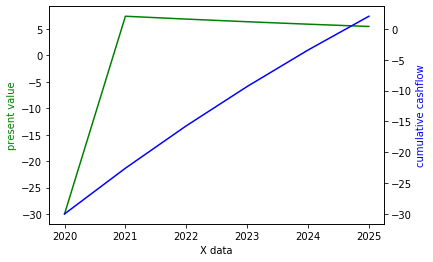

In [29]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['year'], df['present_value']/1000000, 'g-')
ax2.plot(df['year'], df['cum_pv']/1000000, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('present value', color='g')
ax2.set_ylabel('cumulative cashflow', color='b')

plt.show()

In [31]:
# range
ax1_range = ax1.get_ylim()[1] - ax1.get_ylim()[0]
fct = (0 - ax1.get_ylim()[0])/ax1_range

ax2_ylim = ax2.get_ylim()
# calculate new values for the second axis
ax2_ylim_new = (ax2_ylim[0],(0 - ax2_ylim[0]) / fct + ax2_ylim[0])
# set new limits
ax2.set_ylim( ax2_ylim_new )

plt.show()

In [22]:
df

,year,year_n,inflation_factor,revenue,investment,operational,cashflow,cum_cashflow,discount_factor,present_value,cum_pv
0,2020,0,1.000000,0.000000e+00,30000000,0.000000e+00,-30000000,-30000000,1.000000,-30000000,-30000000
1,2021,1,1.020000,1.020000e+07,0,2.040000e+06,8160000,-21840000,0.909091,7418181,-22581819
2,2022,2,1.040400,1.040400e+07,0,2.080800e+06,8323200,-13516800,0.826446,6878677,-15703142
3,2023,3,1.061208,1.061208e+07,0,2.122416e+06,8489664,-5027136,0.751315,6378410,-9324732
4,2024,4,1.082432,1.082432e+07,0,2.164864e+06,8659457,3632321,0.683013,5914525,-3410207
5,2025,5,1.104081,1.104081e+07,0,2.208162e+06,8832646,12464967,0.620921,5484378,2074171


In [23]:
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (<ipython-input-23-ef5505f8296d>, line 1)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
oil_price = widgets.IntSlider(description = 'Oil price: ')
display(oil_price)